### Import library and dataset

In [1]:
import json
import pandas as pd
from datetime import datetime
import numpy as np

file = open('receipts.json', 'r',encoding ='utf-8')

receipts = []
for line in file.readlines():
    lines = json.loads(line)
    receipts.append(lines)


### Prepocessing the dataset

In [2]:
#create dataframe
df = pd.DataFrame(receipts)

# Convert the `_id` column to a normal string format
df["_id"] = df["_id"].apply(lambda x: x["$oid"])
# Convert the `createDate` column to a normal date format
df["createDate"] = df["createDate"].apply(lambda x: datetime.fromtimestamp(x["$date"] / 1000))
# Convert the `dateScanned` column to a normal date format
df["dateScanned"] = df["dateScanned"].apply(lambda x: datetime.fromtimestamp(x["$date"] / 1000))
# Convert the `finishedDate` column to a normal date format
df["finishedDate"] = df["finishedDate"].apply(lambda x: datetime.fromtimestamp(x["$date"] / 1000) if isinstance(x, dict) else pd.NaT)
# Convert the `modifyDate` column to a normal date format
df["modifyDate"] = df["modifyDate"].apply(lambda x: datetime.fromtimestamp(x["$date"] / 1000))
# Convert the `purchaseDate` column to a normal date format
df["purchaseDate"] = df["purchaseDate"].apply(lambda x: datetime.fromtimestamp(x["$date"] / 1000) if isinstance(x, dict) else pd.NaT)
# Convert the `pointsAwardedDate` column to a normal date format
df["pointsAwardedDate"] = df["pointsAwardedDate"].apply(lambda x: datetime.fromtimestamp(x["$date"] / 1000) if isinstance(x, dict) else pd.NaT)

# Print the modified DataFrame
df

# for the df, the rewardsreceiptsitemlist should be seperated if needed lator.

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 10:25:31.000,2021-01-03 10:25:31.000,2021-01-03 10:25:31,2021-01-03 10:25:36.000,2021-01-03 10:25:31,500.0,2021-01-02 19:00:00,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 10:24:43.000,2021-01-03 10:24:43.000,2021-01-03 10:24:43,2021-01-03 10:24:48.000,2021-01-03 10:24:43,150.0,2021-01-02 10:24:43,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 10:25:37.000,2021-01-03 10:25:37.000,NaT,2021-01-03 10:25:42.000,NaT,5,2021-01-02 19:00:00,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 10:25:34.000,2021-01-03 10:25:34.000,2021-01-03 10:25:34,2021-01-03 10:25:39.000,2021-01-03 10:25:34,5.0,2021-01-02 19:00:00,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 10:25:06.000,2021-01-03 10:25:06.000,2021-01-03 10:25:11,2021-01-03 10:25:11.000,2021-01-03 10:25:06,5.0,2021-01-02 10:25:06,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,603cc0630a720fde100003e6,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01 05:22:27.000,2021-03-01 05:22:27.000,NaT,2021-03-01 05:22:28.000,NaT,25.0,2020-08-16 20:00:00,2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
1115,603d0b710a720fde1000042a,NaN,NaN,2021-03-01 10:42:41.873,2021-03-01 10:42:41.873,NaT,2021-03-01 10:42:41.873,NaT,NaN,NaT,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1116,603cf5290a720fde10000413,NaN,NaN,2021-03-01 09:07:37.664,2021-03-01 09:07:37.664,NaT,2021-03-01 09:07:37.664,NaT,NaN,NaT,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1117,603ce7100a7217c72c000405,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01 08:07:28.000,2021-03-01 08:07:28.000,NaT,2021-03-01 08:07:29.000,NaT,25.0,2020-08-16 20:00:00,2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33


### Evaluate the data quality

#### check the data types and basic info of columns

In [3]:
# Validate data types and formats, 
# check the data types and basic info of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   _id                      1119 non-null   object        
 1   bonusPointsEarned        544 non-null    float64       
 2   bonusPointsEarnedReason  544 non-null    object        
 3   createDate               1119 non-null   datetime64[ns]
 4   dateScanned              1119 non-null   datetime64[ns]
 5   finishedDate             568 non-null    datetime64[ns]
 6   modifyDate               1119 non-null   datetime64[ns]
 7   pointsAwardedDate        537 non-null    datetime64[ns]
 8   pointsEarned             609 non-null    object        
 9   purchaseDate             671 non-null    datetime64[ns]
 10  purchasedItemCount       635 non-null    float64       
 11  rewardsReceiptItemList   679 non-null    object        
 12  rewardsReceiptStatus     1119 non-

#### Check for missing values

In [5]:
missing_values = df.isnull().sum()
print("Missing values:", missing_values)
# there are lots of missing values in columns

Missing values: _id                          0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64


#### Check for duplicates

In [21]:
#try duplicates = receipts[receipts.duplicated(subset='_id', keep=False)] does not work
duplicates = [item for item in receipts if receipts.count(item) > 1]
print(duplicates)
# [] means no duplicates

[]


### Summary Statistics and Numeric Variables

#### Distribution and find outliers

count     1119
unique      95
top        nan
freq       435
Name: totalSpent, dtype: object


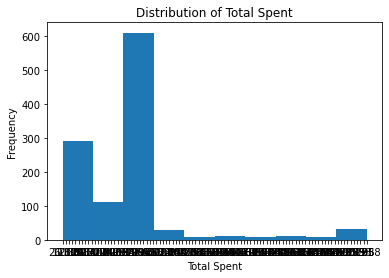

In [27]:
import matplotlib.pyplot as plt
# Convert 'totalSpent' column to string
df['totalSpent'] = df['totalSpent'].astype(str)

# Check summary statistics
print(df['totalSpent'].describe())

# Plot a histogram
plt.hist(df['totalSpent'], bins=10)
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.title('Distribution of Total Spent')
plt.show()

# the histogram shows there are outliers since is a right-screwed plot.

### consistency of categorical variables

In [29]:
# use categorical columns rewardsReceiptStatus 
# Check unique values:
unique_values = df['rewardsReceiptStatus'].unique()
print(unique_values)

['FINISHED' 'REJECTED' 'FLAGGED' 'SUBMITTED' 'PENDING']


In [30]:
# get the count of each unique value in the categorical variable
value_counts = df['rewardsReceiptStatus'].value_counts()
print(value_counts)

FINISHED     518
SUBMITTED    434
REJECTED      71
PENDING       50
FLAGGED       46
Name: rewardsReceiptStatus, dtype: int64


In [31]:
# Data validation rules
valid_categories = ['FINISHED', 'SUBMITTED', 'REJECTED','PENDING', 'FLAGGED']
inconsistent_values = df[~df['rewardsReceiptStatus'].isin(valid_categories)]
print(inconsistent_values)
#  there are no values in the original DataFrame that are not present in the valid_categories list

Empty DataFrame
Columns: [_id, bonusPointsEarned, bonusPointsEarnedReason, createDate, dateScanned, finishedDate, modifyDate, pointsAwardedDate, pointsEarned, purchaseDate, purchasedItemCount, rewardsReceiptItemList, rewardsReceiptStatus, totalSpent, userId]
Index: []
